In [34]:
# Airbnb Listings Bangkok Data Dictionary
# Airbnb adalah platform yang menghubungkan pemilik properti dengan wisatawan yang ingin menyewa tempat tinggal 
# jangka pendek. Di Bangkok, Airbnb sangat populer sebagai alternatif hotel

In [ ]:
# Pernyataan masalah 

# Dari sekian banyak Listing yang tersedia dapat kita lihat bahwa ada 4 jenis penginapan yang tersebar : Entire home/apt, Private room, Hotel room, dan Shared room.
# Walaupun air bnb di bangkok sedang populer atau menjadi salah satu pilihan untuk tourist mencari tempat untuk penginapan, tetapi masih banyak penginapan 
# yang tersedia yang bmasih belum mendapatkan review atau ulasan dikarenakan persaingan yang tinggi dan banyaknya listing penginapan yang ada. Masalah inilah 
# yang harus dipecahkan agar listing penginapan yang belum memiliki ulasan dapat bersaing dengan listing lainnya. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv('Airbnb Listings Bangkok.csv')
display(df.head(),df.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


In [2]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()
display(df.describe(), df.describe(include='object'))

Jumlah baris dan kolom di dataset df adalah (15854, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [3]:
# hapus colom Unnamed
df.drop(df.columns[0], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               

In [4]:
display(df.describe(), df.describe(include='object'))

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [5]:
df.isna().sum()/df.shape[0]*100

id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

In [6]:
df['last_review'].value_counts()

last_review
2022-12-11    189
2022-12-14    184
2022-12-13    179
2022-12-12    172
2022-12-10    142
             ... 
2015-04-05      1
2017-08-01      1
2015-01-01      1
2020-10-12      1
2022-05-08      1
Name: count, Length: 1669, dtype: int64

In [7]:
df['reviews_per_month'].value_counts()

reviews_per_month
0.02     498
0.03     467
1.00     304
0.05     248
0.04     223
        ... 
6.70       1
4.26       1
6.12       1
4.57       1
16.00      1
Name: count, Length: 513, dtype: int64

In [8]:
df.loc[(df['last_review'].isna()),'last_review']='not available'

In [9]:
df.loc[(df['reviews_per_month'].isna()),'reviews_per_month']='0.0'

In [10]:
df.loc[(df['host_name'].isna()),'host_name']='no host name'
df.loc[(df['name'].isna()),'name']='no name'

In [11]:
df.isna().sum()/df.shape[0]*100

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
number_of_reviews_ltm             0.0
dtype: float64

In [12]:
display(df.head(),df.tail())
df.to_excel('AirBnb Bangkok.xlsx', index=False) 

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.5,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,not available,0.0,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,not available,0.0,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,not available,0.0,3,365,0


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,not available,0.0,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,not available,0.0,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,not available,0.0,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,not available,0.0,14,365,0
15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,not available,0.0,14,365,0


In [13]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(15854, 16)


,dataFeatures,dataType,null,unique,uniqueSample
0,id,int64,0,15854,"[42798429, 765781484209218358]"
1,name,object,0,14795,"[Baan Sri-kram 550m from MRT Taopoon - 3BR, 1 ..."
2,host_id,int64,0,6659,"[146460831, 86817233]"
3,host_name,object,0,5313,"[Saifon, Святослав]"
4,neighbourhood,object,0,50,"[Chatu Chak, Bang Na]"
5,latitude,float64,0,9606,"[13.762097136508409, 13.8708]"
6,longitude,float64,0,10224,"[100.59885, 100.643198]"
7,room_type,object,0,4,"[Shared room, Entire home/apt]"
8,price,int64,0,3040,"[1836, 3086]"
9,minimum_nights,int64,0,86,"[20, 45]"


In [14]:
# cek data duplicate
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [ ]:
# Data Analisis

In [15]:
df.sort_values(by='number_of_reviews', ascending=False)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3737,20869092,Beautiful One Bedroom Apartment Near Skytrain,116193397,Suchada,Phaya Thai,13.77369,100.54079,Entire home/apt,1571,3,1224,2022-12-16,19.13,1,310,109
6586,31077175,FREE PICK UP⭐BKK AIRPORT/BREAKFAST/PRIVATE DELUXE,158545122,Pailin,Lat Krabang,13.72132,100.76495,Private room,1032,1,807,2022-12-12,16.62,3,348,146
1470,9453790,37 Nature House: 10 mins to DMK Int'l Airport,35462876,Wuthiphon,Lak Si,13.87145,100.58039,Entire home/apt,1039,1,533,2022-12-04,6.22,9,346,18
905,5964843,The Mustang Nero/No.4 The Horse,30963587,Themustang,Khlong Toei,13.71143,100.59390,Hotel room,2329,1,486,2022-12-06,5.26,10,47,6
622,6013487,The Mustang Nero/No.3 The Wolf,30963587,Themustang,Khlong Toei,13.71286,100.59172,Hotel room,2329,1,477,2022-11-22,5.11,10,50,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8604,37756223,ะีนสอ,81368134,서령,Bang Kapi,13.74866,100.63056,Entire home/apt,7374,1,0,not available,0.0,2,365,0
8601,37742625,The Tree Rio 美好憧憬,272358230,Charles,Bang Phlat,13.80104,100.50630,Entire home/apt,1420,59,0,not available,0.0,28,365,0
8599,37732429,Cozy for 2 PPL/30 mins to DMK Airport/Near cen...,283666264,Prangsiri,Bang Khen,13.88789,100.60346,Entire home/apt,750,2,0,not available,0.0,4,365,0
8598,37269588,Bangkok high-rise skyline,221316282,Irkpl,Vadhana,13.74117,100.58255,Private room,3227,1,0,not available,0.0,1,365,0


In [16]:
df['reviews_per_month'].astype(float)

0        0.50
1        0.00
2        0.00
3        0.03
4        0.00
         ... 
15849    0.00
15850    0.00
15851    0.00
15852    0.00
15853    0.00
Name: reviews_per_month, Length: 15854, dtype: float64

In [38]:
# Data Analyst -> Get Review terbanyak di setiap type kamar , tipe kamar yang paling banyak di review
df.loc[df.groupby('room_type')['number_of_reviews'].idxmax()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3737,20869092,Beautiful One Bedroom Apartment Near Skytrain,116193397,Suchada,Phaya Thai,13.77369,100.54079,Entire home/apt,1571,3,1224,2022-12-16,19.13,1,310,109
905,5964843,The Mustang Nero/No.4 The Horse,30963587,Themustang,Khlong Toei,13.71143,100.59390,Hotel room,2329,1,486,2022-12-06,5.26,10,47,6
6586,31077175,FREE PICK UP⭐BKK AIRPORT/BREAKFAST/PRIVATE DELUXE,158545122,Pailin,Lat Krabang,13.72132,100.76495,Private room,1032,1,807,2022-12-12,16.62,3,348,146
1538,9917169,Lamurr Sukhumvit41 near BTS @ center of Bangkok 3,50986869,Alongkorn,Vadhana,13.72882,100.57318,Shared room,380,2,153,2022-12-19,1.88,2,359,7


In [40]:
# Data Analyst -> Data kamar yang paling mahal di setiap tipe kamar memiliki reviews per month brp

df.loc[df.groupby('room_type')['price'].idxmax()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
12868,635676064543597376,New 1 bedroom apartment BTS MRT Asoke,12464705,Lucio,Vadhana,13.742186,100.560394,Entire home/apt,1100000,14,0,not available,0.0,1,365,0
2668,16139502,Nice Check-in My Hostel (Private 2 beds),51074483,Nuttawut,Ratchathewi,13.751130,100.527310,Hotel room,300000,1,2,2020-02-23,0.03,5,365,0
4373,22633450,rm 1 : cozy & comfy,117057915,Jeab,Bang Phlat,13.791630,100.490380,Private room,600700,1,9,2020-01-26,0.17,5,330,0
7857,35043601,72+ ppl stay in siam hostel in middle of bangkok,187894052,SiamStadium,Parthum Wan,13.747590,100.523940,Shared room,31200,1,0,not available,0.0,4,360,0


In [67]:
top_neigh=df.groupby('neighbourhood').size().reset_index(name='name')\
.sort_values(by='name', ascending=False).head(10)
print(top_neigh)

   neighbourhood  name
47       Vadhana  2153
22   Khlong Toei  2097
18   Huai Khwang  1125
37   Ratchathewi  1114
8       Bang Rak   827
41        Sathon   809
33   Phra Nakhon   619
32  Phra Khanong   558
13    Chatu Chak   548
6        Bang Na   458


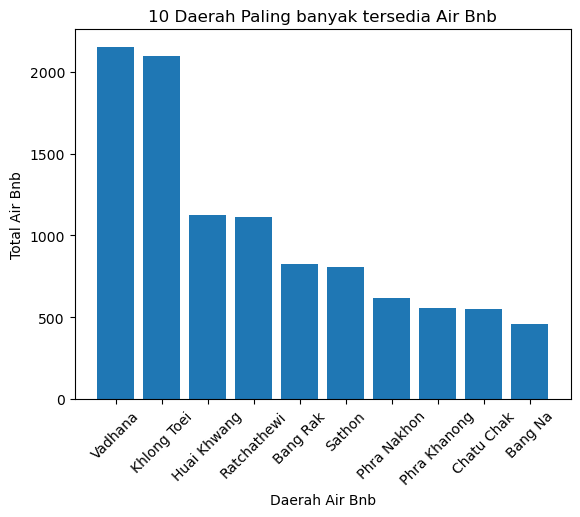

In [68]:
plt.bar(top_neigh['neighbourhood'], top_neigh['name'])
plt.xlabel('Daerah Air Bnb')
plt.ylabel('Total Air Bnb')
plt.title('10 Daerah Paling banyak tersedia Air Bnb')
plt.xticks(rotation=45)
plt.show()

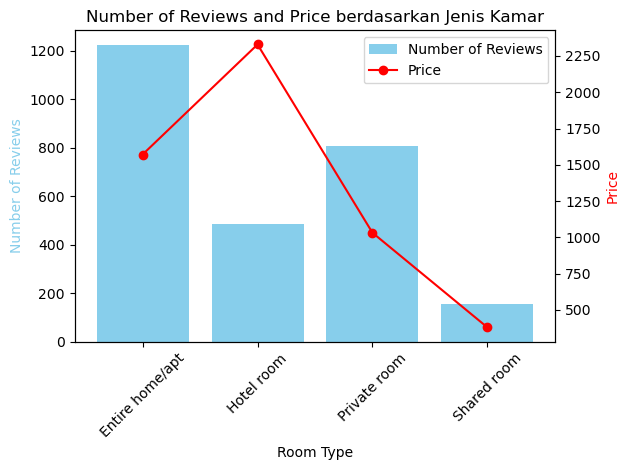

In [41]:
top_reviews = df.loc[df.groupby('room_type')['number_of_reviews'].idxmax()]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(top_reviews['room_type'], top_reviews['number_of_reviews'], color='skyblue', label='Number of Reviews')
ax2.plot(top_reviews['room_type'], top_reviews['price'], color='red', marker='o', label='Price')

ax1.set_xlabel('Room Type')
ax1.set_ylabel('Number of Reviews', color='skyblue')
ax2.set_ylabel('Price', color='red')
plt.title('Number of Reviews and Price berdasarkan Jenis Kamar')
ax1.tick_params(axis='x', rotation=45)

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.show()

In [22]:
df.loc[df['room_type'] == 'Entire home/apt', ['name','neighbourhood','price', 'number_of_reviews','reviews_per_month','number_of_reviews_ltm']] \
                .sort_values(by='number_of_reviews', ascending=False)

,name,neighbourhood,price,number_of_reviews,reviews_per_month,number_of_reviews_ltm
3737,Beautiful One Bedroom Apartment Near Skytrain,Phaya Thai,1571,1224,19.13,109
1470,37 Nature House: 10 mins to DMK Int'l Airport,Lak Si,1039,533,6.22,18
53,"♡Chic Studio, Easy Walk to Pier & BTS Taksin♡",Sathon,866,472,4.02,29
80,✺✺99 feet in the sky✺✺,Sathon,829,430,3.39,10
127,☀ ☼Sky bedroom with a smooth life view☼☀,Sathon,750,426,3.39,10
...,...,...,...,...,...,...
10400,Cozy stay heart of Bangkok,Parthum Wan,1500,0,0.0,0
5376,217 Bang Phlat House,Bang Phlat,4800,0,0.0,0
1181,Luxury townhouse,Bang Kapi,6000,0,0.0,0
10398,"1 BR 40sqm Apt Sathorn area,WiFi,Pool,Pet Frie...",Yan na wa,1599,0,0.0,0


   neighbourhood  count
22   Khlong Toei   1520
47       Vadhana   1451
18   Huai Khwang    776
37   Ratchathewi    656
41        Sathon    557


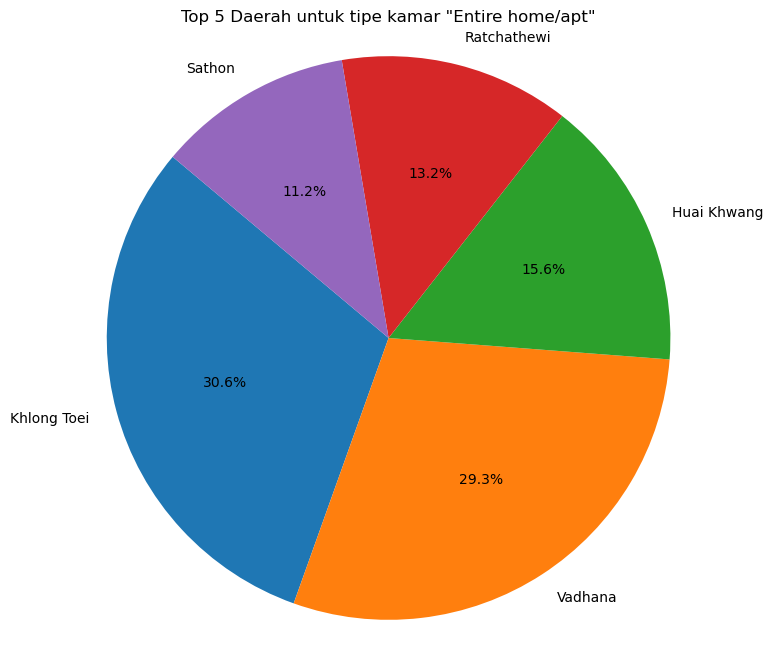

In [42]:
data_apart = df[(df['room_type'] == 'Entire home/apt')]
group_data_apart = data_apart.groupby('neighbourhood').size().reset_index(name='count')\
.sort_values(by='count', ascending=False).head(5)
print(group_data_apart)

plt.figure(figsize=(8, 8))
plt.pie(group_data_apart['count'], labels=group_data_apart['neighbourhood'], 
        autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Daerah untuk tipe kamar "Entire home/apt"')
plt.axis('equal')  
plt.show()

   neighbourhood  count
29       Vadhana    105
21   Phra Nakhon     77
14   Khlong Toei     73
24   Ratchathewi     70
6       Bang Rak     67


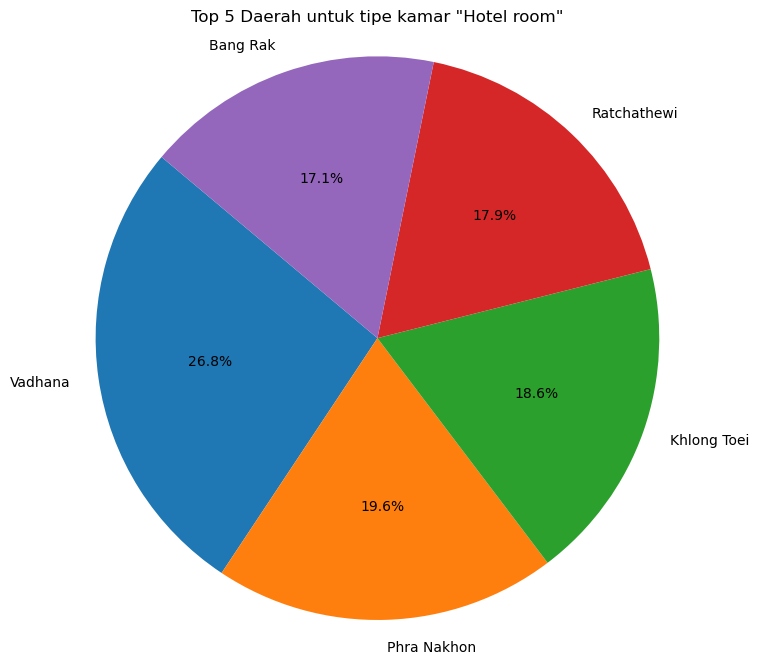

In [31]:
data_apart = df[(df['room_type'] == 'Hotel room')]
group_data_apart = data_apart.groupby('neighbourhood').size().reset_index(name='count')\
.sort_values(by='count', ascending=False).head(5)
print(group_data_apart)

plt.figure(figsize=(8, 8))
plt.pie(group_data_apart['count'], labels=group_data_apart['neighbourhood'], 
        autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Daerah untuk tipe kamar "Hotel room"')
plt.axis('equal') 
plt.show()

   neighbourhood  count
47       Vadhana    544
22   Khlong Toei    489
8       Bang Rak    375
33   Phra Nakhon    355
37   Ratchathewi    327


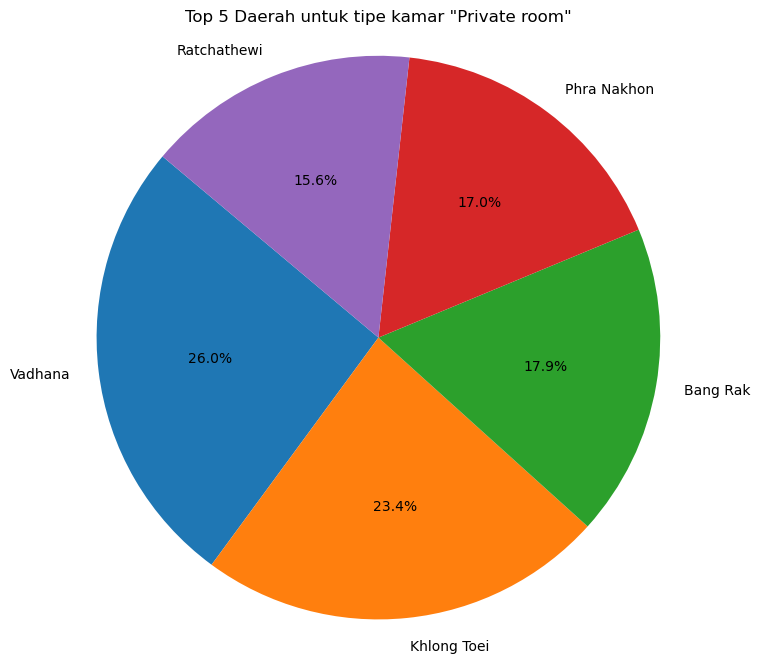

In [43]:
data_apart = df[(df['room_type'] == 'Private room')]
group_data_apart = data_apart.groupby('neighbourhood').size().reset_index(name='count')\
.sort_values(by='count', ascending=False).head(5)
print(group_data_apart)

plt.figure(figsize=(8, 8))
plt.pie(group_data_apart['count'], labels=group_data_apart['neighbourhood'], 
        autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Daerah untuk tipe kamar "Private room"')
plt.axis('equal')  
plt.show()

   neighbourhood  count
24   Phra Nakhon    131
27   Ratchathewi     61
34       Vadhana     53
5       Bang Rak     34
14   Huai Khwang     23


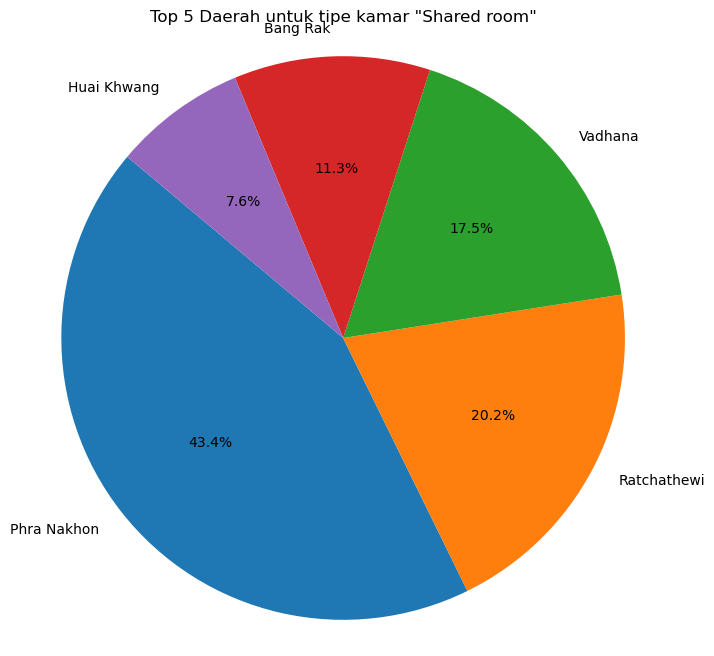

In [44]:
data_apart = df[(df['room_type'] == 'Shared room')]
group_data_apart = data_apart.groupby('neighbourhood').size().reset_index(name='count')\
.sort_values(by='count', ascending=False).head(5)
print(group_data_apart)

plt.figure(figsize=(8, 8))
plt.pie(group_data_apart['count'], labels=group_data_apart['neighbourhood'], 
        autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Daerah untuk tipe kamar "Shared room"')
plt.axis('equal') 
plt.show()

In [49]:
data_apart = df[(df['room_type'] == 'Entire home/apt')]
group_data_apart = data_apart.sort_values(by='number_of_reviews', ascending=True).head(5)
selected_columns = group_data_apart[['name','room_type','price', 'neighbourhood','number_of_reviews','minimum_nights']]
print(selected_columns)


                                                    name        room_type  \
15840                        Sukhumvit Condo Next to BTS  Entire home/apt   
10982  Greenery house @BKK Hospital - 5 mins to Thonglor  Entire home/apt   
10978  Supalai loft near BTS TalatPhlu and Shopping mall  Entire home/apt   
10976                                          M jatujak  Entire home/apt   
10972  True Digital park, BTS punnawithi, modern private  Entire home/apt   

       price neighbourhood  number_of_reviews  minimum_nights  
15840   1400       Bang Na                  0              28  
10982   4700   Huai Khwang                  0               2  
10978   1350     Thon buri                  0               3  
10976   1600    Chatu Chak                  0              30  
10972    700  Phra Khanong                  0              20  


In [98]:
df[['price', 'number_of_reviews']].describe()

,price,number_of_reviews
count,1.585400e+04,15854.000000
mean,3.217704e+03,16.654157
std,2.497212e+04,40.613331
min,0.000000e+00,0.000000
25%,9.000000e+02,0.000000
50%,1.429000e+03,2.000000
75%,2.429000e+03,13.000000
max,1.100000e+06,1224.000000


In [94]:
df['room_type'].value_counts()

room_type
Entire home/apt    8912
Private room       5770
Hotel room          649
Shared room         523
Name: count, dtype: int64

In [95]:
df.groupby('room_type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,8912.0,3465.474529,30076.447369,332.0,1028.0,1536.0,2571.0,1100000.0
Hotel room,649.0,3028.309707,12015.858835,0.0,995.0,1700.0,3170.0,300000.0
Private room,5770.0,3064.603640,17295.872058,278.0,800.0,1212.0,2092.0,600700.0
Shared room,523.0,919.757170,2147.960499,280.0,390.0,500.0,650.0,31200.0


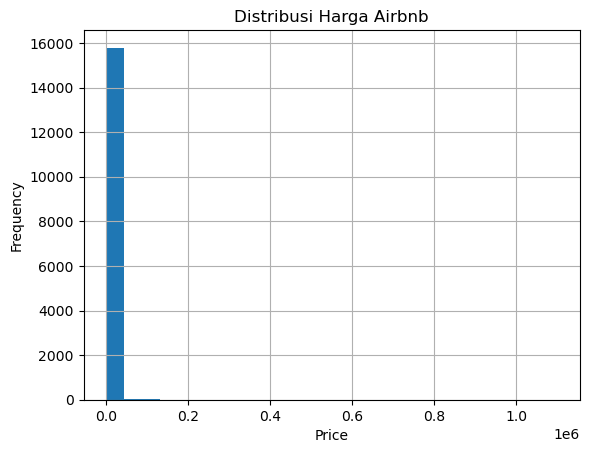

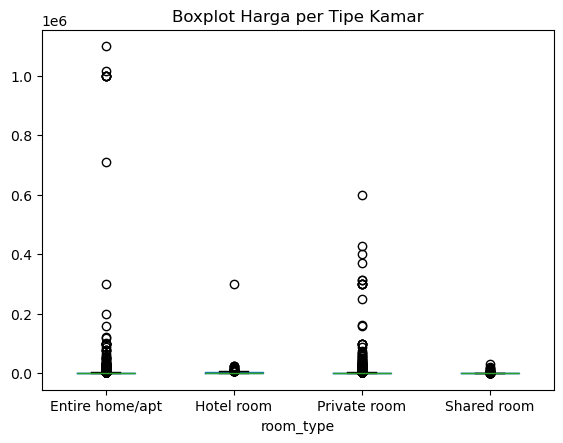

In [97]:

df['price'].hist(bins=25)
plt.title('Distribusi Harga Airbnb')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

df.boxplot(column='price', by='room_type', grid=False)
plt.title('Boxplot Harga per Tipe Kamar')
plt.suptitle('')
plt.show()
